#Customer Segmentation & Marketing Campaign Effectiveness Analysis
via: https://www.kaggle.com/datasets/jackdaoud/marketing-data?resource=download



In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.inspection import partial_dependence, PartialDependenceDisplay



In [167]:
df = pd.read_csv('/content/drive/My Drive/ifood_df.csv')
df = pd.DataFrame(df)

## Data Exploration

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

Overview: 2,205 records across 39 columns, with no missing values.

In [5]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


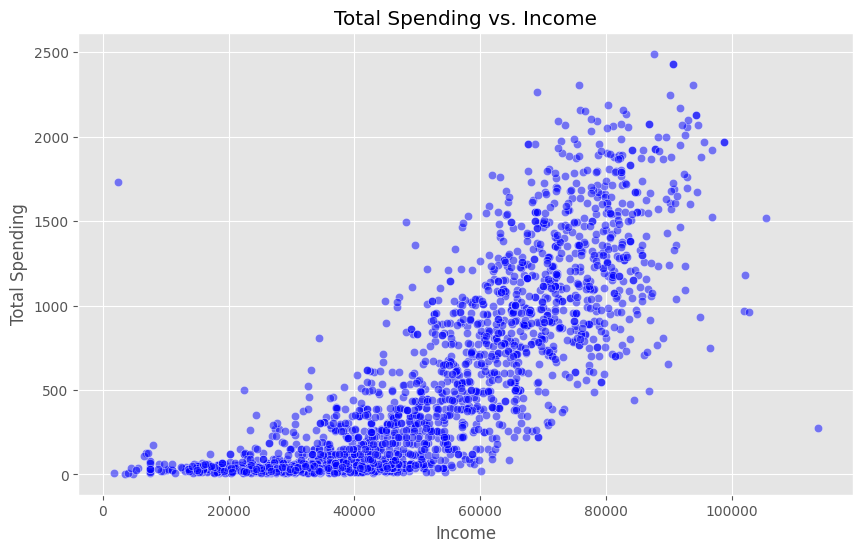

In [169]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Income"], y=df["MntTotal"], alpha=0.5, color='blue')
plt.title("Total Spending vs. Income")
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.show()

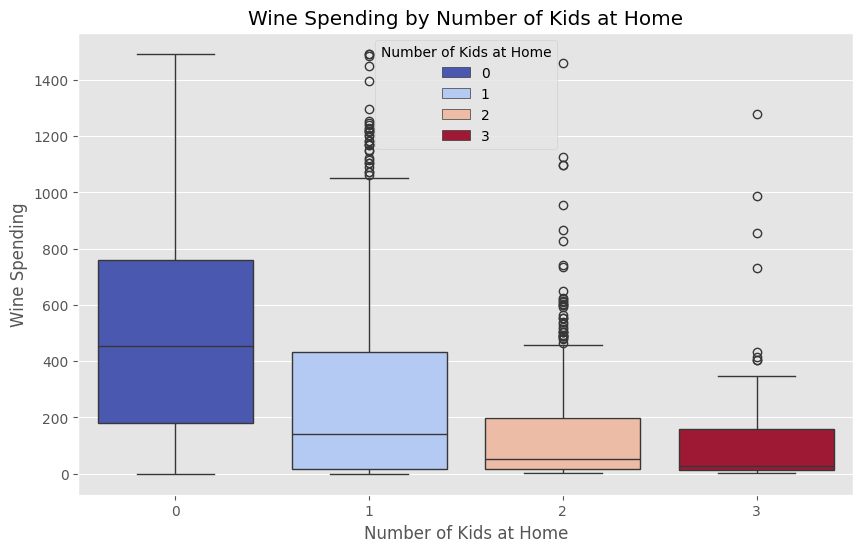

In [171]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Kidhome"] + df["Teenhome"], y=df["MntWines"], hue=df["Kidhome"] + df["Teenhome"], palette="coolwarm")
plt.title("Wine Spending by Number of Kids at Home")
plt.xlabel("Number of Kids at Home")
plt.ylabel("Wine Spending")
plt.legend(title="Number of Kids at Home")
plt.show()

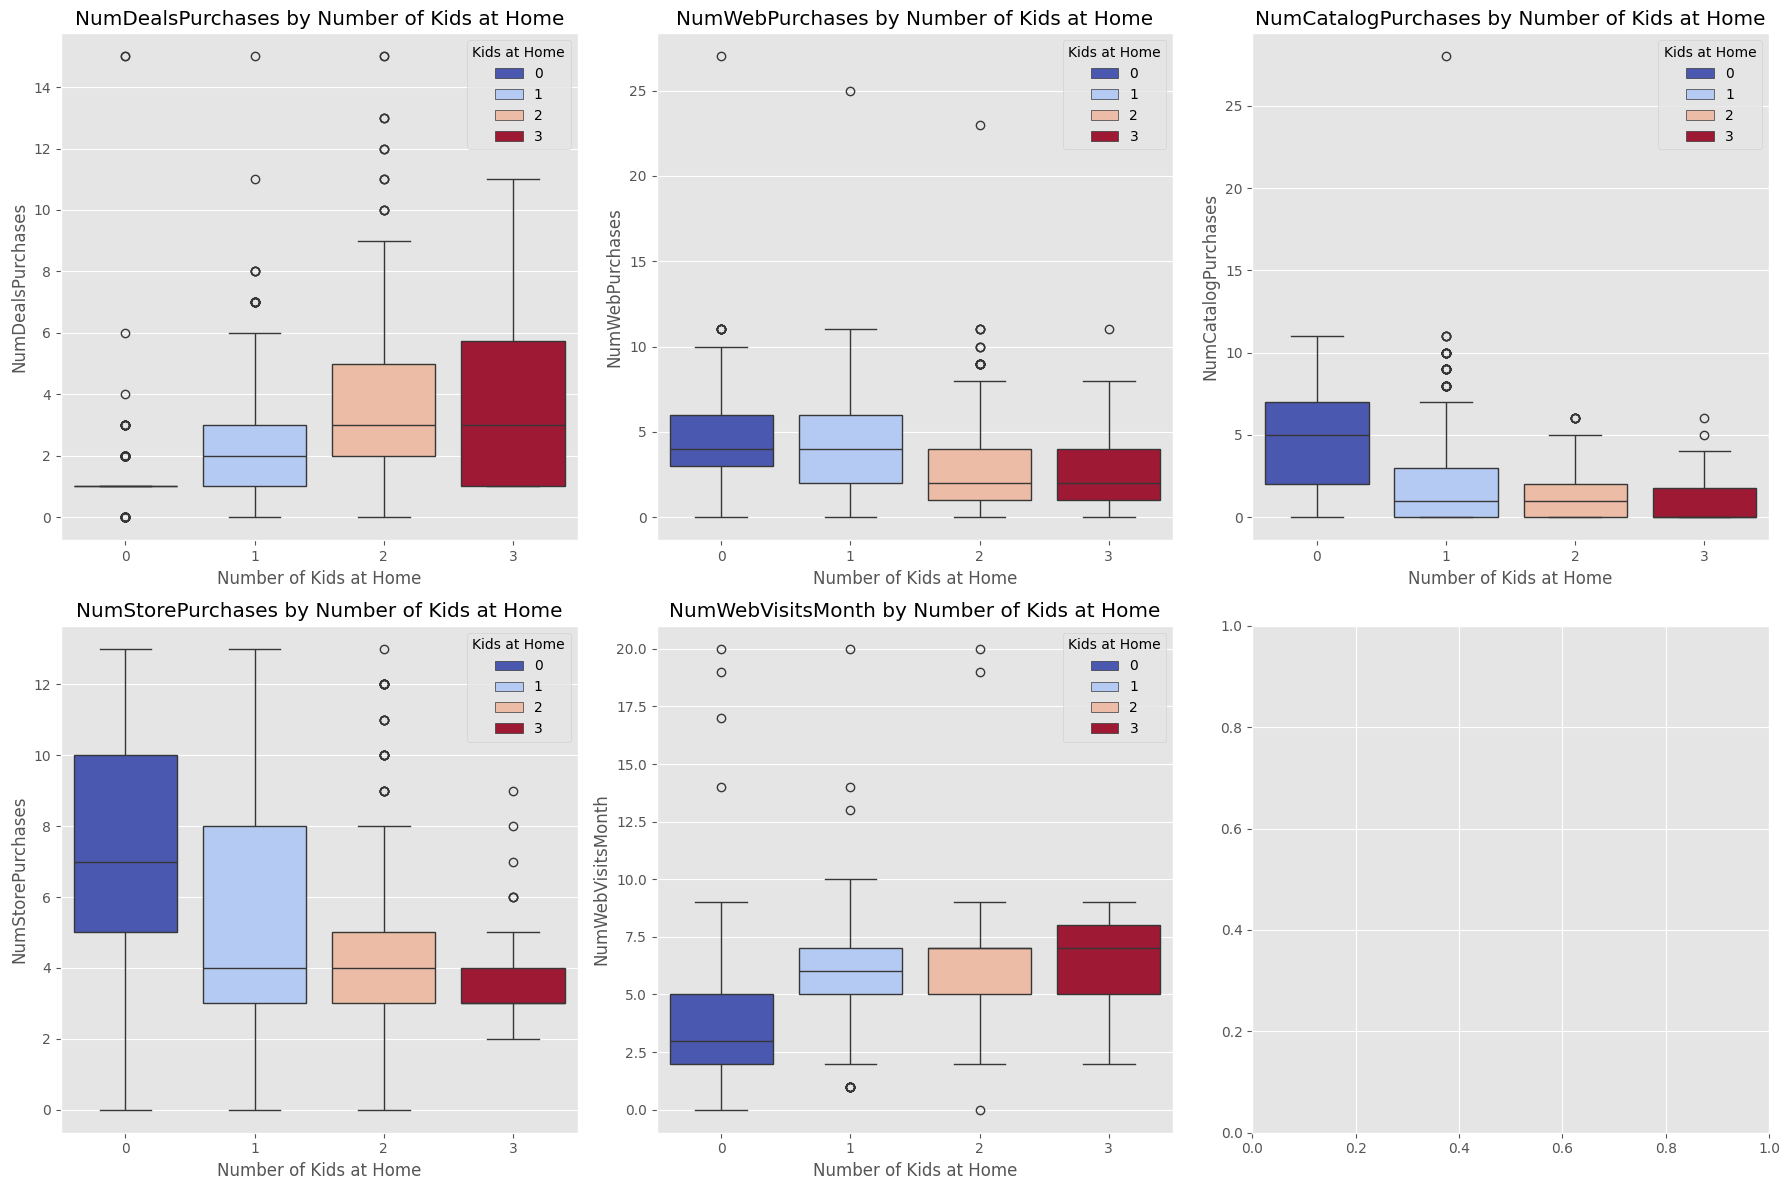

In [191]:
purchase_categories = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, category in enumerate(purchase_categories):
    sns.boxplot(x=df["Kidhome"] + df["Teenhome"], y=df[category], hue=df["Kidhome"] + df["Teenhome"], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"{category} by Number of Kids at Home")
    axes[i].set_xlabel("Number of Kids at Home")
    axes[i].set_ylabel(category)
    axes[i].legend(title="Kids at Home")

plt.tight_layout()
plt.show()

## Customer Segmentation

In [141]:
selected_features = [
    "Income", "Age", "MntTotal", "NumDealsPurchases", "NumCatalogPurchases",
    "NumStorePurchases", "NumWebPurchases", "NumWebVisitsMonth", "Recency",
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_features])

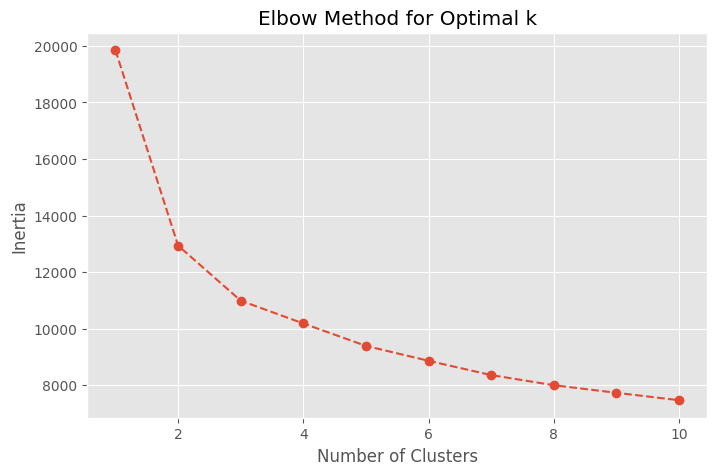

In [142]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [143]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = df.groupby("Cluster")[selected_features].mean()
cluster_summary

,Income,Age,MntTotal,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,,,
0,74860.655068,52.298033,1240.615734,1.317700,5.794251,8.493192,5.128593,2.909228,49.698941
1,30307.536661,42.176287,69.522621,1.989080,0.468019,3.004680,2.062402,6.987520,45.120125
2,55759.964356,53.944554,651.887129,4.382178,2.720792,7.497030,6.867327,6.439604,47.611881
3,42105.309045,59.849246,118.296482,1.891960,0.826633,3.806533,2.165829,5.311558,55.899497


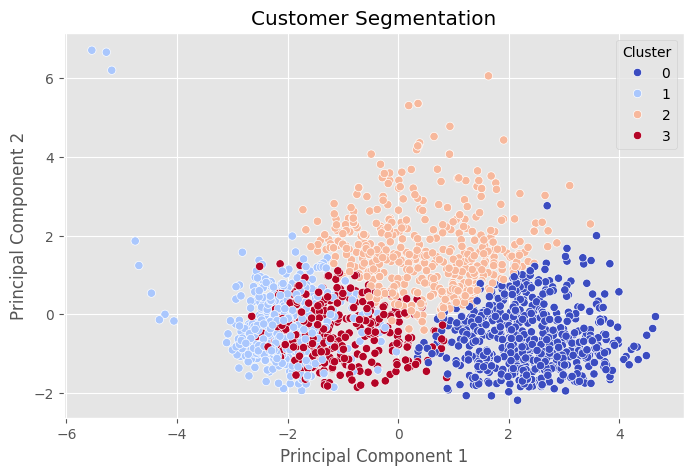

In [144]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="coolwarm")
plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

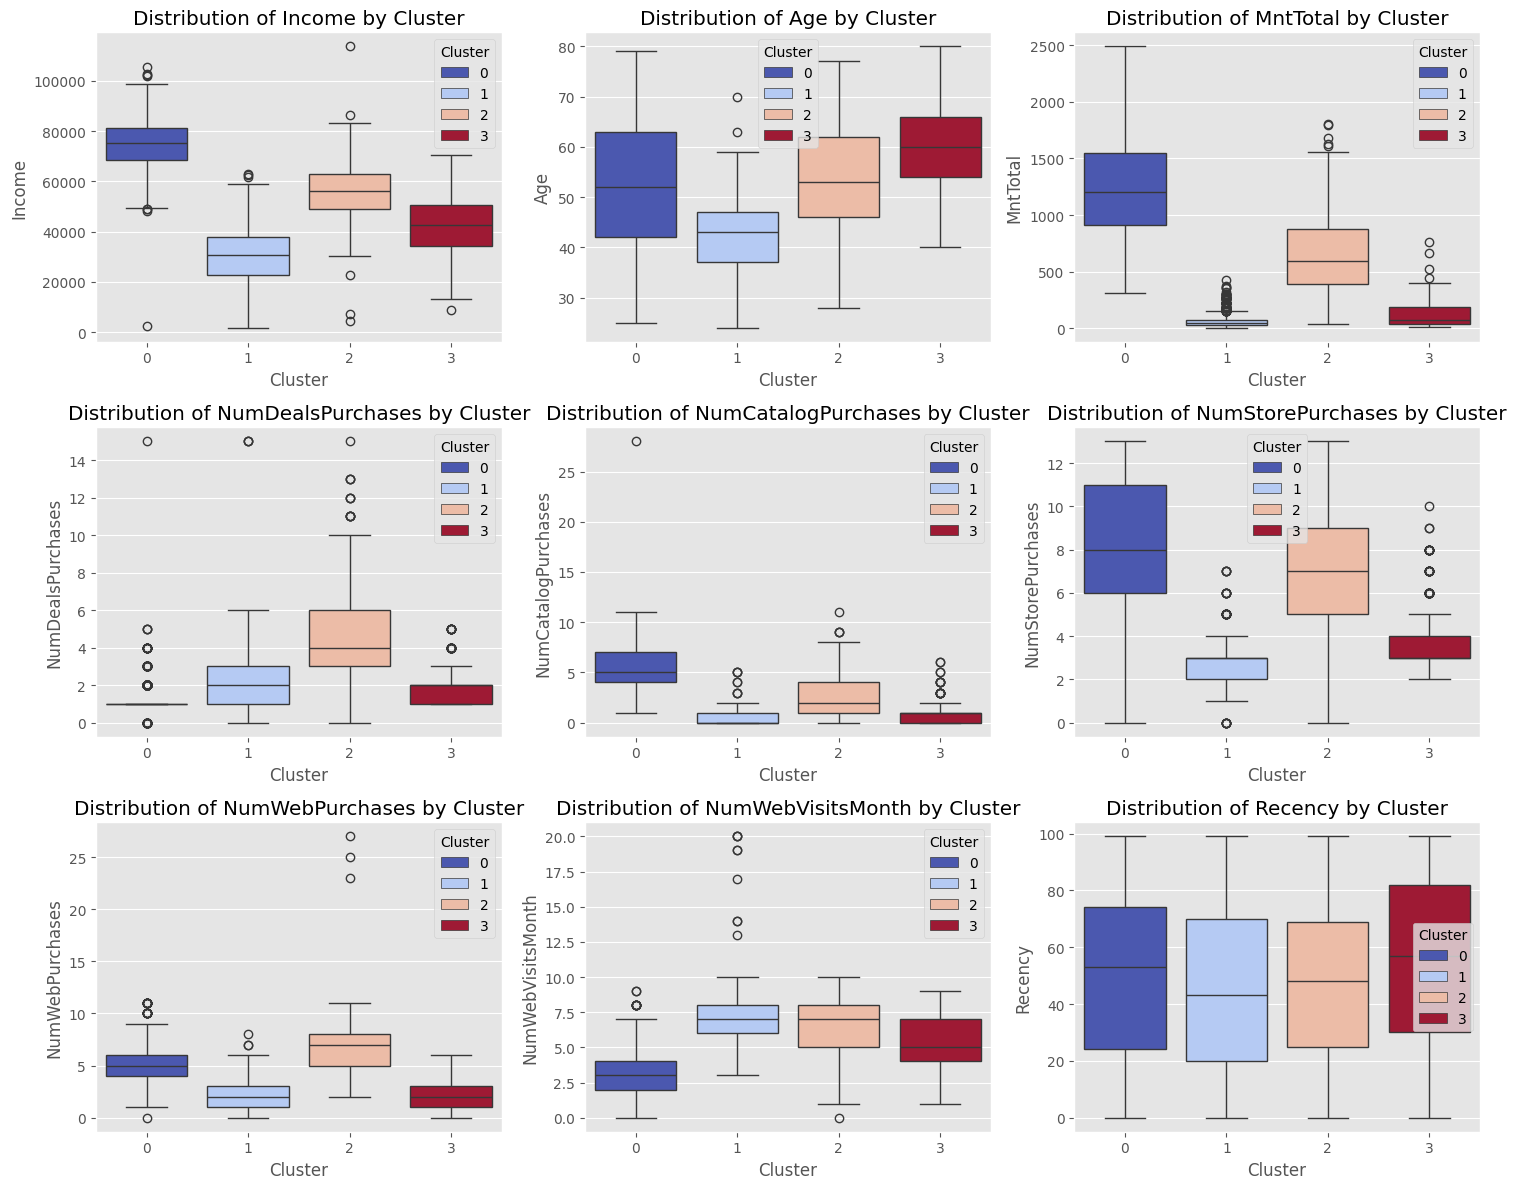

In [145]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.boxplot(x=df["Cluster"], y=df[feature], hue=df["Cluster"], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f'Distribution of {feature} by Cluster')

plt.tight_layout()
plt.show()

Cluster 0: high income, high spend, multi-channel buyers

Cluster 1: low income, low spend, high web visit with low web spend

Cluster 2: middle income, deal driven, active buyers

Cluster 3: middle income, older, infrequenct buyers

## Marketing Campaign Effectiveness

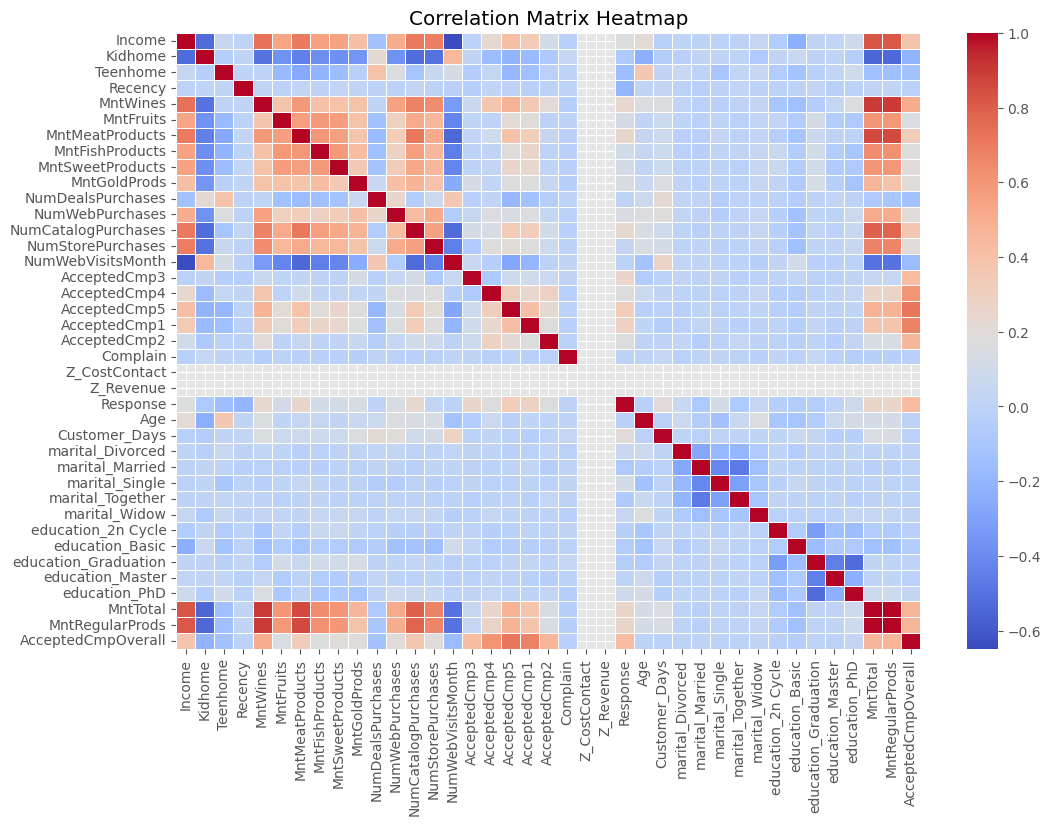

,Response
Response,1.000000
AcceptedCmpOverall,0.426961
AcceptedCmp5,0.324648
AcceptedCmp1,0.296978
MntTotal,0.264895
MntRegularProds,0.262363
AcceptedCmp3,0.253576
MntMeatProducts,0.248821
MntWines,0.245559
NumCatalogPurchases,0.234524


In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

correlation_matrix["Response"].sort_values(ascending=False)

Strongest Positive Correlations with Campaign Response
* AcceptedCmpOverall (0.43): Customers who have accepted past campaigns are more likely to accept new ones.
* MntTotal (0.26) and MntRegularProds (0.26): Higher spending customers tend to respond more positively to campaigns.
* MntMeatProducts (0.25) and MntWines (0.25): Customers who spend on Meat and Wines categories are more likely to accept campaigns.
* NumCatalogPurchases (0.23): Customers who purchase via catalogs are more likely to engage with marketing offers.

Negative Correlations with Campaign Response
* Recency (-0.20): Customers who made a purchase recently are less likely to respond to campaigns.
* Teenhome (-0.16): Households with teenagers are less likely to respond to campaigns.



<ipython-input-183-172a76851a55>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_acceptance_rates.index, y=campaign_acceptance_rates.values, palette="coolwarm")


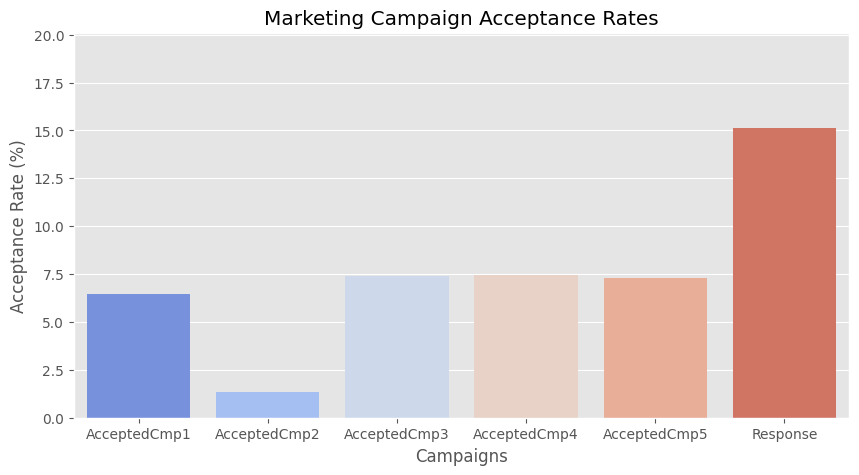

In [183]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_acceptance_rates = df[campaigns].mean() * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=campaign_acceptance_rates.index, y=campaign_acceptance_rates.values, palette="coolwarm")
plt.title("Marketing Campaign Acceptance Rates")
plt.ylabel("Acceptance Rate (%)")
plt.xlabel("Campaigns")
plt.ylim(0, max(campaign_acceptance_rates.values) + 5)
plt.show()

Campaign 2 was lease successful, with 3, 4, and 5 performing similarly, and the response having the highest acceptance rate.

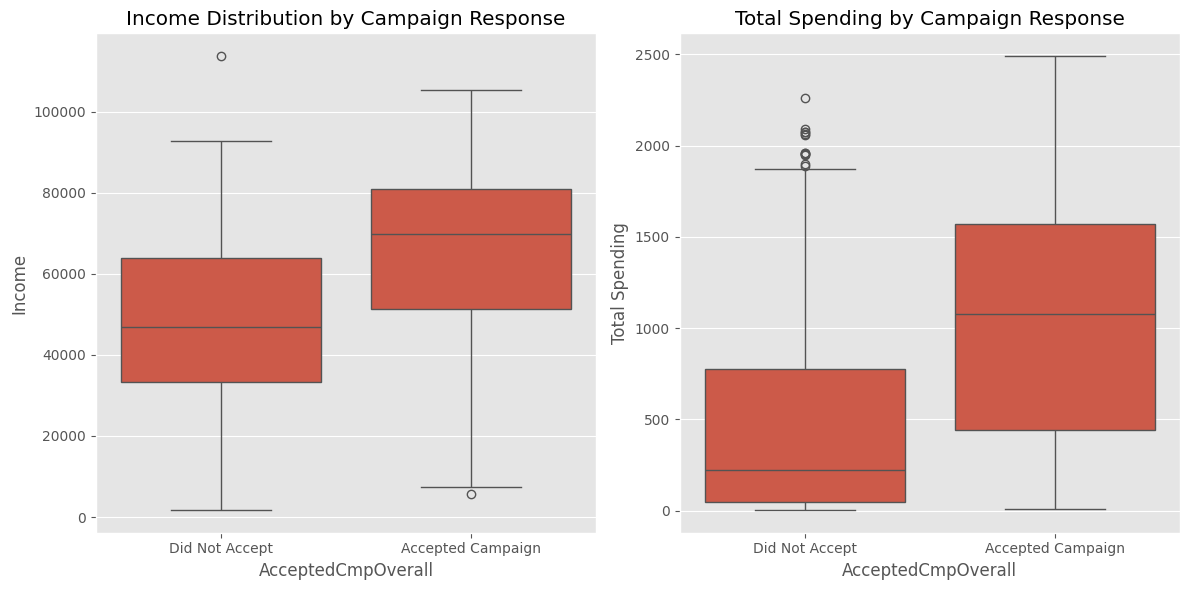

In [185]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=df["AcceptedCmpOverall"] > 0, y=df["Income"], ax=axes[0])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Did Not Accept", "Accepted Campaign"])
axes[0].set_title("Income Distribution by Campaign Response")
axes[0].set_ylabel("Income")

sns.boxplot(x=df["AcceptedCmpOverall"] > 0, y=df["MntTotal"], ax=axes[1])
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Did Not Accept", "Accepted Campaign"])
axes[1].set_title("Total Spending by Campaign Response")
axes[1].set_ylabel("Total Spending")

plt.tight_layout()
plt.show()

Customers with a higher income are more likely to accept the campaign. Customers who accepted at least one campaign tend to spend more.

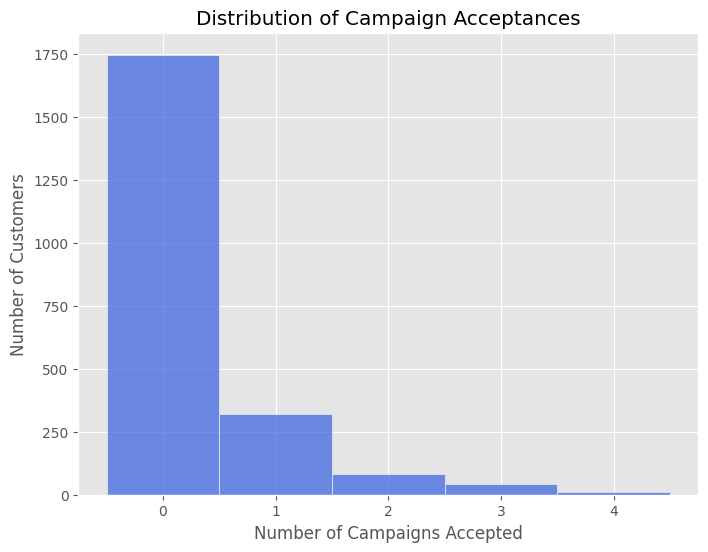

In [190]:
plt.figure(figsize=(8, 6))
sns.histplot(df["AcceptedCmpOverall"], bins=range(6), discrete=True, kde=False, color="royalblue")
plt.xlabel("Number of Campaigns Accepted")
plt.ylabel("Number of Customers")
plt.title("Distribution of Campaign Acceptances")
plt.xticks(range(5))
plt.show()

A large portion of customers are not responding to markerting efforts. Acceptance decreases with multiple offers, showing how repeated engagament is rare.

## Customer Lifetime Value (CLV)

In [15]:
df["TotalPurchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"] + df["NumDealsPurchases"]
df["AvgPurchaseValue"] = df["MntTotal"] / (df["TotalPurchases"] + 1)
df["CustomerLifespan"] = df["Customer_Days"] / 365

df["PurchaseFrequency"] = df["TotalPurchases"] / df["CustomerLifespan"]

df["CLV"] = df["AvgPurchaseValue"] * df["PurchaseFrequency"] * df["CustomerLifespan"]

clv_summary = df[["AvgPurchaseValue", "PurchaseFrequency", "CustomerLifespan", "CLV"]].describe()
clv_summary

,AvgPurchaseValue,PurchaseFrequency,CustomerLifespan,CLV
count,2205.000000,2205.000000,2205.000000,2205.000000
mean,28.126844,2.158232,6.884160,534.637782
std,26.106527,1.085711,0.554969,551.134687
min,0.437500,0.000000,5.915068,0.000000
25%,6.666667,1.145226,6.408219,49.777778
50%,19.600000,2.191753,6.890411,323.000000
75%,39.655172,3.030686,7.364384,923.218750
max,150.357143,5.817272,7.830137,2407.966667


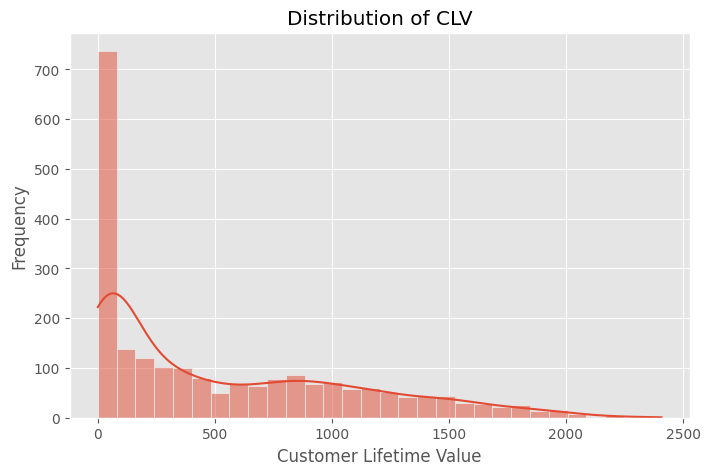

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df["CLV"], bins=30, kde=True)
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Frequency")
plt.title("Distribution of CLV")
plt.show()

In [20]:
df["CLV_Segment"] = pd.qcut(df["CLV"], q=3, labels=["Low", "Medium", "High"])

clv_segment_summary = df.groupby("CLV_Segment", observed=False)["CLV"].describe()
clv_segment_summary

,count,mean,std,min,25%,50%,75%,max
CLV_Segment,,,,,,,,
Low,735.0,35.898876,18.934599,0.000000,20.000000,33.333333,49.638889,80.000000
Medium,735.0,350.001402,190.222828,80.100000,189.461538,323.000000,507.315789,732.695652
High,735.0,1218.013067,353.098145,739.423077,923.628606,1151.357143,1461.015079,2407.966667


Low-Value Customers Insights
* Might be price sensitive and need targeted promotions, personalized discounts or incentives.

Medium-Value Customers
* Moderate engagement, potencial for personalized deals to increase engagement.

High-Value Customers
* Most profitable customers, prioritize retention with loyalty programs.

In [26]:
demographic_columns = ["Income", "Kidhome", "Teenhome", "marital_Divorced", "marital_Married", "marital_Single", "marital_Together", "marital_Widow"]

clv_demographics = df.groupby("CLV_Segment", observed=False)[demographic_columns].mean()
clv_demographics

,Income,Kidhome,Teenhome,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow
CLV_Segment,,,,,,,,
Low,31099.770068,0.840816,0.428571,0.099320,0.394558,0.231293,0.255782,0.019048
Medium,51116.010884,0.421769,0.692517,0.102041,0.389116,0.208163,0.262585,0.038095
High,72650.503401,0.063946,0.398639,0.111565,0.378231,0.209524,0.254422,0.046259


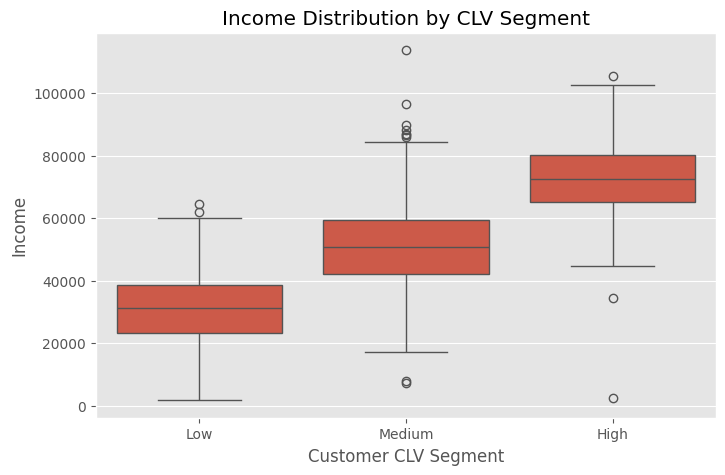

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["CLV_Segment"], y=df["Income"])
plt.xlabel("Customer CLV Segment")
plt.ylabel("Income")
plt.title("Income Distribution by CLV Segment")
plt.show()

Income  
* Income may be a strong predictor of customer value, with higher income households contributing more revenue over time compared to lower income households.

Kid/Teen home
* Lower CLV customers tend to have more kids in their household, where higher CLV customers tend to have fewer kids, suggesting higher spend flexiblity.


In [33]:
campaign_columns = ["AcceptedCmpOverall", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]

clv_campaign_response = df.groupby("CLV_Segment", observed=False)[campaign_columns].mean()
clv_campaign_response

,AcceptedCmpOverall,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
CLV_Segment,,,,,,,
Low,0.084354,0.000000,0.002721,0.077551,0.004082,0.000000,0.074830
Medium,0.172789,0.024490,0.004082,0.057143,0.074830,0.012245,0.126531
High,0.640816,0.168707,0.034014,0.087075,0.144218,0.206803,0.251701


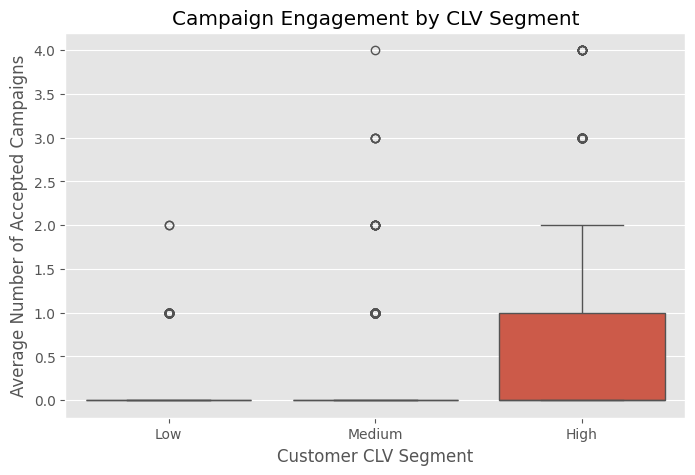

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["CLV_Segment"], y=df["AcceptedCmpOverall"])
plt.xlabel("Customer CLV Segment")
plt.ylabel("Average Number of Accepted Campaigns")
plt.title("Campaign Engagement by CLV Segment")
plt.show()

High CLV customers engage the most with marketing campaigns, responding the most, and most likely to accept the latest campaign, while Low CLV customers rarely accept or respond to campaigns.  

## Predictive Modeling

Which factors drive campaign acceptance

In [40]:
y = df["Response"]

features_campaign = [
    "Income", "Kidhome", "Teenhome", "Recency", "MntTotal",
    "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth",
    "AcceptedCmpOverall", "marital_Divorced", "marital_Married", "marital_Single",
    "marital_Together", "marital_Widow"
]

X = df[features_campaign]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(classification_rep)

0.8843537414965986
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       374
           1       0.79      0.33      0.46        67

    accuracy                           0.88       441
   macro avg       0.84      0.66      0.70       441
weighted avg       0.88      0.88      0.86       441



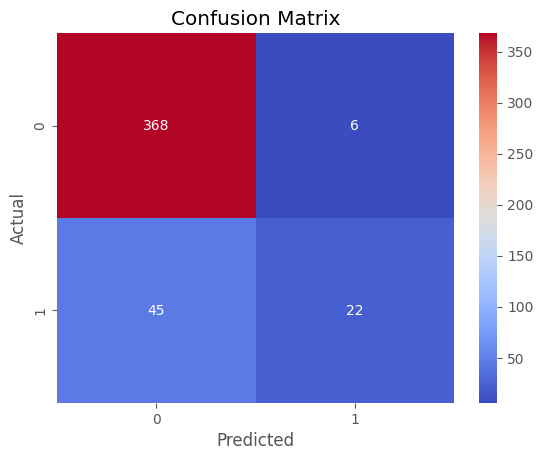

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

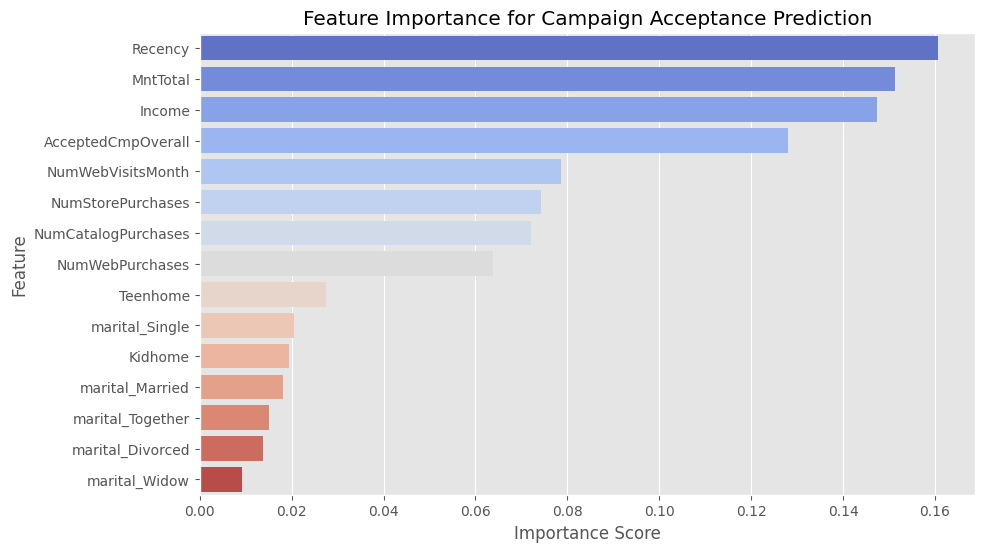

In [46]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], hue=feature_importances["Feature"], legend=False, palette="coolwarm")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for Campaign Acceptance Prediction")
plt.show()

-0.2004131358910245


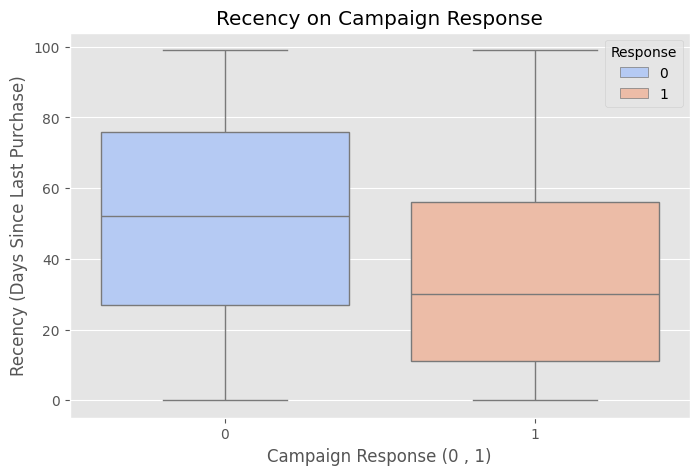

In [107]:
recency_correlation = df["Recency"].corr(df["Response"])
print(recency_correlation)

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Response"], y=df["Recency"], hue=df["Response"], palette="coolwarm")
plt.xlabel("Campaign Response (0 , 1)")
plt.ylabel("Recency (Days Since Last Purchase)")
plt.title("Recency on Campaign Response")
plt.show()

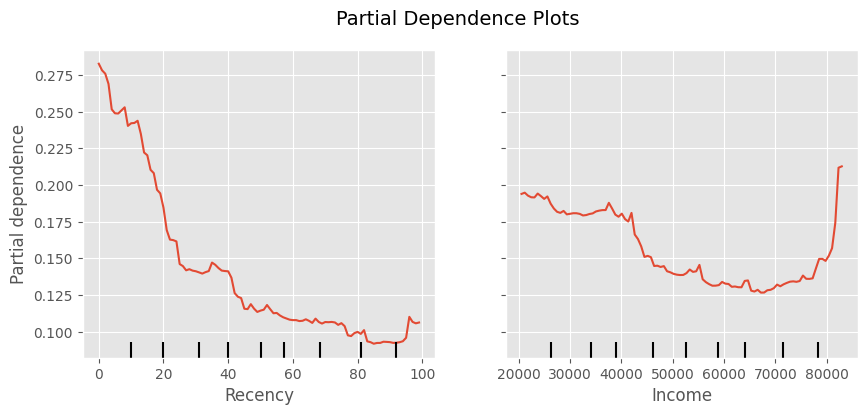

In [103]:
pdp_features = ["Recency", "Income"]

fig, ax = plt.subplots(figsize=(10, 4))
PartialDependenceDisplay.from_estimator(rf_model, X_test, pdp_features, ax=ax)
plt.suptitle("Partial Dependence Plots", fontsize=14)
plt.show()

A higher recency leads to lower response probability, where recent buyers are more likely to enagage with the campaign.

The PDP shows that Income may not strongly influence campaign acceptance, although it has a strong feature importance score. Other factors may be contributing to its high ranking.